In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [49]:
datapath ='C:/Users/Neha/Desktop/Downloads/spam-filter/emails.csv'
data = pd.read_csv(datapath)

In [50]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [51]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [52]:
stemmer = PorterStemmer()
lem = WordNetLemmatizer()

In [53]:
stop_words = stopwords.words('english')

In [54]:
corpus = []
for i in range(0,len(data)):
    email = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    email = email.lower()
    email = email.split()
    email = [stemmer.stem(word) for word in email if not word in stop_words]
    email = ' '.join(email)
    corpus.append(email)

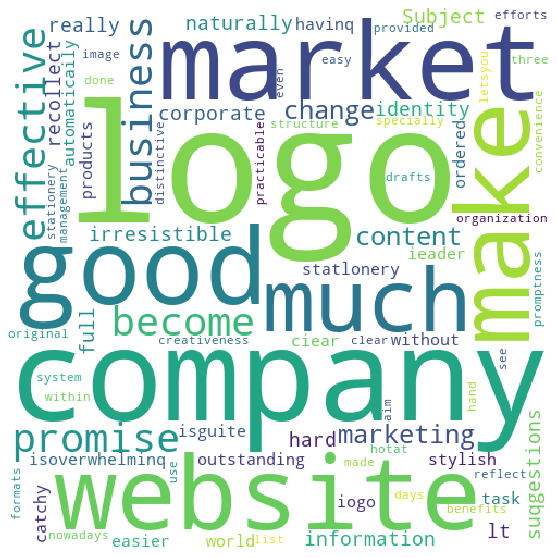

In [55]:
wordcloud = WordCloud(width = 500, height = 500, background_color ='white', stopwords = stop_words, 
                min_font_size = 10).generate(data['text'][0]) 
                     
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show() 

In [56]:
cv = CountVectorizer()
X = cv.fit_transform(corpus)
X = X.toarray()
Y = data.iloc[:,1]

In [57]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
nb.score(X_test,Y_test)

0.9825479930191972

In [59]:
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9764397905759162

In [60]:
tf = TfidfVectorizer()
X = tf.fit_transform(corpus)
X = X.toarray()
Y = data.iloc[:,1]

In [61]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [62]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
nb.score(X_test,Y_test)

0.9057591623036649

In [63]:
svm = LinearSVC()
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)

0.9921465968586387